<a href="https://colab.research.google.com/github/harshmudgil97/almabetter-EDA/blob/main/CH_Harsh_Mudgil_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [220]:
import numpy as np
import pandas as pd

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/EDA Self Project/Hotel Bookings.csv')

In [6]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#Determining distribution channels with high ADR per month

Distribution channels with highest ADR, per month should be the focus of the marketing spend, to attract more customers.

In [273]:
df_a = df.groupby(['arrival_date_month','distribution_channel'])['adr'].mean().unstack()

In [275]:
df_a

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
arrival_date_month,,,,,
April,69.506132,99.523556,96.344444,102.033148,NaN
August,92.665061,161.898404,144.600000,137.520457,29.625
December,52.996086,93.565880,84.150909,80.414481,NaN
February,54.898209,71.510560,94.596316,75.612502,NaN
January,56.391486,63.135985,88.476190,73.682859,NaN
July,97.303323,146.999842,146.666000,124.672332,112.700
June,97.024611,126.272123,134.888889,116.734161,NaN
March,57.040800,76.761017,93.856250,83.280498,NaN
May,82.942954,109.854567,147.796000,110.024039,NaN


In [279]:
df_a = df_a.fillna(0)

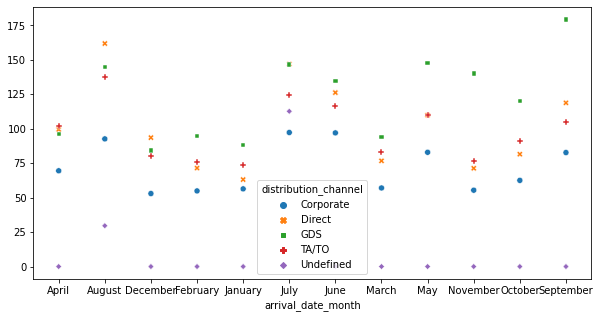

In [286]:
sns.scatterplot(data = df_a)

#Determining Distribution channel attracting most numbers of repeated guests, per month

In [289]:
df_b = df.groupby(['arrival_date_month','distribution_channel'])['is_repeated_guest'].sum().unstack()

In [291]:
df_b = df_b.fillna(0)

In [313]:
df_b

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
arrival_date_month,,,,,
April,144.0,65.0,1.0,73.0,0.0
August,51.0,61.0,0.0,111.0,0.0
December,127.0,89.0,0.0,98.0,0.0
February,133.0,119.0,0.0,159.0,0.0
January,164.0,105.0,0.0,128.0,0.0
July,94.0,61.0,0.0,146.0,0.0
June,138.0,75.0,0.0,69.0,0.0
March,175.0,129.0,1.0,121.0,0.0
May,180.0,72.0,0.0,114.0,0.0


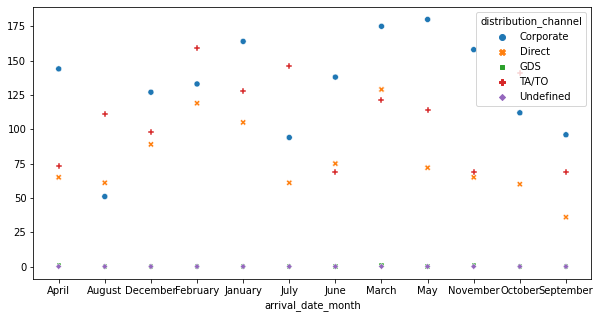

In [292]:
sns.scatterplot(data = df_b)  

#Determining distribution channels with highest cancellation percentage per month



In [327]:
df_c = df.groupby(['arrival_date_month','distribution_channel']).agg({'is_canceled':['count','sum']})

In [331]:
df_c['cancel_percent'] = (df_c['is_canceled'].loc[:,'sum']/df_c['is_canceled'].loc[:,'count'])*100

In [332]:
df_c.drop('is_canceled',axis=1,inplace=True)

In [333]:
df_c = df_c.unstack().fillna(0)

In [336]:
df_c[['Corporate', 'Direct','GDS','TA/TO','Undefined']] = df_c.cancel_percent.loc[:,:'undefined']

In [338]:
df_c.drop('cancel_percent',axis = 1,inplace=True)

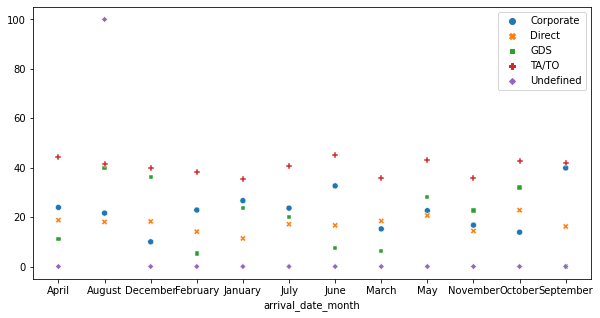

In [339]:
sns.scatterplot(data = df_c)

#Determining distribution channels, bringing in customers with most number of special requests, per month.

In [344]:
df_d = df.groupby(['arrival_date_month','distribution_channel'])['total_of_special_requests'].sum().unstack()

In [345]:
df_d

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
arrival_date_month,,,,,
April,92.0,618.0,2.0,5071.0,NaN
August,102.0,1550.0,2.0,8564.0,5.0
December,111.0,598.0,0.0,3454.0,NaN
February,103.0,632.0,2.0,3504.0,NaN
January,117.0,371.0,6.0,2752.0,NaN
July,98.0,1098.0,0.0,7307.0,2.0
June,123.0,683.0,2.0,5361.0,NaN
March,147.0,491.0,0.0,4234.0,NaN
May,153.0,518.0,8.0,5601.0,NaN


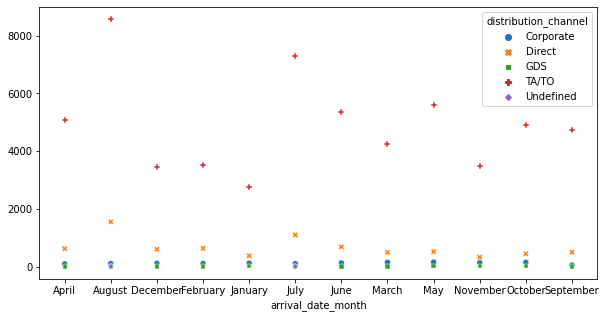

In [346]:
sns.scatterplot(data = df_d)

#Merging to compare data from same month, country and distribution channels

In [128]:
from functools import reduce

In [258]:
df_list = [df_a,df_b,df_c,df_d]

In [259]:
df_final = reduce(lambda left,right: pd.merge(left,right,how='inner',on=['arrival_date_month','country','distribution_channel']), df_list)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [260]:
df_final.columns = ['arrival_date_month','country','distribution_channel','adr','is_repeated_guest','cancel_percent','total_of_special_requests']

In [261]:
df_final.head()

,arrival_date_month,country,distribution_channel,adr,is_repeated_guest,cancel_percent,total_of_special_requests
0,April,AGO,Direct,113.2090,3,10.0,10
1,April,AGO,TA/TO,134.6080,1,80.0,3
2,April,ALB,TA/TO,109.0000,0,100.0,0
3,April,AND,TA/TO,115.0000,0,100.0,0
4,April,ARE,TA/TO,108.8375,0,75.0,5


In [262]:
df_final['score'] = (df_final['adr'] + df_final['is_repeated_guest'] + df['total_of_special_requests'])-df_final['cancel_percent']
df_final

,arrival_date_month,country,distribution_channel,adr,is_repeated_guest,cancel_percent,total_of_special_requests,score
0,April,AGO,Direct,113.209000,3,10.000000,10,106.209000
1,April,AGO,TA/TO,134.608000,1,80.000000,3,55.608000
2,April,ALB,TA/TO,109.000000,0,100.000000,0,9.000000
3,April,AND,TA/TO,115.000000,0,100.000000,0,15.000000
4,April,ARE,TA/TO,108.837500,0,75.000000,5,34.837500
...,...,...,...,...,...,...,...,...
2034,September,USA,Direct,142.066579,0,2.631579,21,140.435000
2035,September,USA,TA/TO,118.387413,0,20.279720,114,99.107692
2036,September,VEN,TA/TO,112.686000,0,80.000000,4,33.686000
2037,September,VNM,TA/TO,94.810000,0,0.000000,1,94.810000


In [263]:
df_final.drop(['adr','is_repeated_guest','cancel_percent','total_of_special_requests'],inplace=True,axis=1)

In [264]:
df_final = df_final.sort_values(by='score',ascending=False)

In [269]:
df_final.groupby(['arrival_date_month','country','distribution_channel'])['score'].sum()

arrival_date_month  country  distribution_channel
April               AGO      Direct                  106.209000
                             TA/TO                    55.608000
                    ALB      TA/TO                     9.000000
                    AND      TA/TO                    15.000000
                    ARE      TA/TO                    34.837500
                                                        ...    
September           USA      Direct                  140.435000
                             TA/TO                    99.107692
                    VEN      TA/TO                    33.686000
                    VNM      TA/TO                    94.810000
                    ZAF      TA/TO                   145.775000
Name: score, Length: 2039, dtype: float64